# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J.*

**Names:**

* *Kenza Driss*
* *Maximilien Hoffbeck*
* *Jaeyi Jeong*
* *Yoojin Kim*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
import networkx as nx

# Create an empty, undirected graph
G = nx.Graph()

# Open the csv file in reading mode
with open("../data/network1.csv", "r") as n1: # I called it n1 because it's "network1.csv"
    for line in n1: # for each lines in the network1.csv file we iterate ...
        if line.startswith("#"):  # Ignore comment lines
            continue
        i, j = line.strip().split(",")  # Split the line into two node values
        G.add_edge(int(i), int(j))  # Add an edge between node i and node j

print("Number of nodes :", G.number_of_nodes())  # Total number of nodes
print("Number of edges :", G.number_of_edges())  # Total number of edges


Number of nodes : 13033
Number of edges : 18584


# Exercise 2.1 explanation
First, we will load `network1.csv` into a graph structure using `networkx`.
Each row in the file represents an edge between two nodes.
Lines starting with `#` are comments and should be ignored. Therefore, we print how many nodes and edges does the graph contain

#### Exercise 2.2:  Node degree distribution

Properties of the degree distribution :
Minimum degree : 1
Maximum degree : 1482
Average degree : 2.85
The distribution is skewed with a long tail, indicating a few high-degree hubs and many low-degree nodes.
Calculating best minimal value for power law fit
Power-law exponent (γ) estimated by powerlaw : 2.20
Minimum degree (xmin) for power-law fit : 14.0


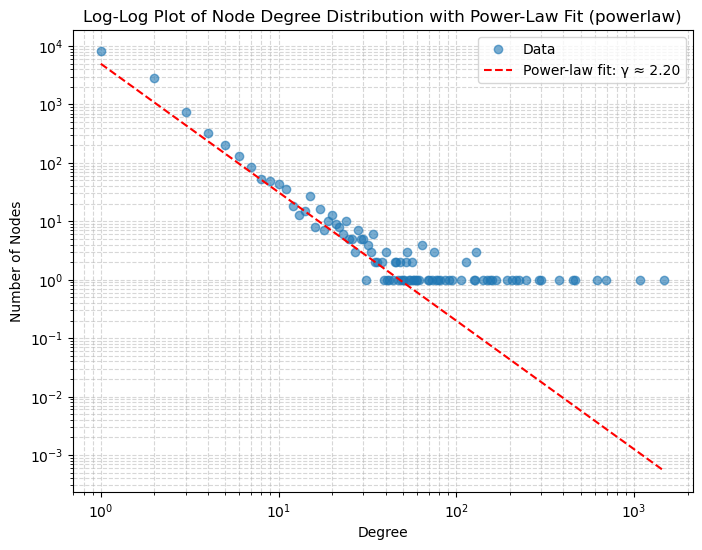

The degree distribution follows a power-law distribution P(k) ~ k^(-γ) with an estimated exponent γ ≈ 2.20.
This confirms a scale-free network, where a few nodes (hubs) have significantly higher degrees, consistent with real-world networks.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from powerlaw import Fit

node_degree = [] # Create a list for node degrees
for node in G:  # Iterate to ...
    node_degree.append(G.degree(node)) # ... Get the degree of the node and add it in the list 
# If reader prefers list comprehension, we can also write this code like this : 
# node_degree = [G.degree(node) for node in G]

# Compute degree frequency
degree_counts = np.bincount(node_degree)  # Counts occurrences of each degree
degrees = np.nonzero(degree_counts)[0]    # Get degrees that appear at least once
counts = degree_counts[degrees]           # Corresponding counts

# Print the degree distribution in a readable format (commented out)
# print("Degree Distribution :")
# for degree, count in zip(degrees, counts):
#     print(f"Degree {degree}: {count} nodes")
    

# Question 2 : Output properties of the degree distribution
min_degree = min(node_degree)  # Find the minimum degree
max_degree = max(node_degree)  # Find the maximum degree
avg_degree = 2 * G.number_of_edges() / G.number_of_nodes()  # Calculate average degree for undirected graph
print("Properties of the degree distribution :")
print(f"Minimum degree : {min_degree}")
print(f"Maximum degree : {max_degree}")
print(f"Average degree : {avg_degree:.2f}")
print("The distribution is skewed with a long tail, indicating a few high-degree hubs and many low-degree nodes.")

# Question 3 : Perform power-law fitting using the powerlaw library
# Create a Fit object with automatic xmin estimation
fit = Fit(node_degree)
gamma = fit.power_law.alpha  # Extract the power-law exponent (γ)
xmin = fit.power_law.xmin    # Get the automatically estimated minimum degree (xmin) for the fit

print(f"Power-law exponent (γ) estimated by powerlaw : {gamma :.2f}")
print(f"Minimum degree (xmin) for power-law fit : {xmin}")

# Generate power-law fit curve for degrees >= xmin
# Filter data for plotting (only degrees >= xmin)
filtered_indices = degrees >= xmin
filtered_degrees = degrees[filtered_indices]
filtered_counts = counts[filtered_indices]

# Question 1: Create Log-Log plot
plt.figure(figsize=(8, 6))  # Set figure size
# Plot the original data
plt.loglog(degrees, counts, marker="o", linestyle="none", label="Data", alpha=0.6)

# Add power-law fit curve
# Generate fit line using P(k) ~ k^(-γ) with approximate normalization
fit_line = (filtered_counts[0] / (filtered_degrees[0]**(-gamma))) * degrees**(-gamma)
plt.loglog(degrees, fit_line, linestyle="--", color="red", label=f"Power-law fit: γ ≈ {gamma:.2f}")

# Set plot properties
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Log-Log Plot of Node Degree Distribution with Power-Law Fit (powerlaw)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)  # Add grid for better readability
plt.show()

# Question 3: Output distribution analysis
print(f"The degree distribution follows a power-law distribution P(k) ~ k^(-γ) with an estimated exponent γ ≈ {gamma :.2f}.")
print("This confirms a scale-free network, where a few nodes (hubs) have significantly higher degrees, consistent with real-world networks.")

# Exercise 2.2 explanation 

### 1. Compute Node Degrees  
- We iterate through all nodes in the graph `G` and compute their **degree** (number of edges).  
- This is stored in `node_degree`, which contains the degree of each node.

### 2. Compute Degree Frequency  
- `np.bincount(node_degree)`: Counts how many nodes have each degree.  
- `degrees = np.nonzero(degree_counts)[0]`: Extracts only the degrees that actually appear in the graph.  
- `counts = degree_counts[degrees]`: Stores the corresponding number of nodes for each degree.  

### 3. Print the Degree Distribution  
- We print the **degree and the number of nodes** that have that degree.  
- This helps in understanding how the nodes are distributed based on their connectivity.

### 4️. Log-Log Plot of the Degree Distribution  
- We plot the **degree distribution** on a **log-log scale** to check if the network follows a **power-law distribution**.  
- We first tried by using a histogram plot but it didn't seem effective to visualize the result hence we chose to use loglog plot
- The x-axis represents **node degree**, while the y-axis represents **the number of nodes** with that degree.  
- If the plot appears as a straight line, the network likely follows a **scale-free property**.  

### Answer to the questions :
#### 1. What kind of plot do you think is useful for this task ? 
=> Log-Log Plot. Actually, to answer this question, we had to answer the third question first. If the network follows a power-law distribution, a log-log plot (plt.loglog) is the best choice.
Why so? It's because in scale-free networks, most nodes have a small degree, while a few "hub" nodes have an extremely high degree. This results in a long tail distribution, which appears as a straight line on a log-log plot.

#### 2. Can you list some of the properties of the degree distribution ? 
=> 
- **Minimum degree** : 1, indicating that every node has at least one connection.
- **Maximum degree** : 1482, showing the presence of a few high-degree hub nodes.
- **Average degree** : 2.85, calculated as $( \frac{2 \times 18584}{13033} $), suggesting a sparse network where most nodes have few connections.
- **Skewness and long tail** : The distribution is highly skewed, with a long tail visible in the log-log plot, indicating that most nodes have low degrees while a few have significantly higher degrees.
- **Hubs** : The presence of nodes with degrees up to 1482 highlights the existence of hubs, which are likely critical for network connectivity.

#### 3. Is it close to a well-known probability distribution ? If so, provide an estimation of its parameter(s) ? 
=>
Using the `powerlaw` library, the degree distribution is found to follow a **power-law distribution** $( P(k) \sim k^{-\gamma} $). The estimated power-law exponent is $(\gamma \approx 2.20$), which falls within the typical range (2 to 3) for scale-free networks. The `powerlaw` library identified a minimum degree threshold ($(x_{min} = 14$)) for the power-law fit, excluding noisy low-degree data to ensure a more accurate estimation. This confirms that the network exhibits scale-free properties, where a few nodes (hubs) have significantly higher degrees, consistent with real-world networks like social or internet graphs. 



#### Exercise 2.3: Giant component

In [3]:
import networkx as nx

# Calculate the number of connected components in the graph G
nb_of_connected_components = nx.number_connected_components(G)
print(f"The number of connected components in network1 is : {nb_of_connected_components}")

# Identify the giant component (the largest connected component) by finding the component with the most nodes
giant_component = max(nx.connected_components(G), key=len)

# Calculate the size of the giant component (number of nodes in the largest component)
giant_size = len(giant_component)

# Get the total number of nodes in the graph G
total_nb_of_nodes = G.number_of_nodes()

# Check if the giant component size is greater than 70% of the total nodes. We could compute with 0.5,0.6,0.7,0.8 ... It wasn't explicitly given the percentage so we chose 70%.
if giant_size > 0.7 * total_nb_of_nodes:
    # If true, print that a giant component exists along with its size
    print(f"There exists a giant component and its size is : {giant_size}")
else:
    # If false, print that there is no giant component
    print("There isn't any giant component in network1")

The number of connected components in network1 is : 192
There exists a giant component and its size is : 12576


# Exercise 2.3 explanation 

### 1. Counting Connected Components :
- We use the `nx.number_connected_components(G)` function to count the total number of connected components in the graph G.
- A connected component is a subset of nodes where there is a path between any pair of nodes within the subset, and no path exists to nodes outside the subset.
- `print(f"The number of connected components in network1 is : {nb_of_connected_components}")`: This prints the number of connected components.

### 2. Identifying the Giant Component : 
- We use the `max(nx.connected_components(G), key=len)` to find the largest connected component, which is considered the potential giant component.
- `nx.connected_components(G)` returns a generator of all connected components, and `max()` with `key=len` selects the one with the most nodes.
- The largest component is stored in giant_component as a set of nodes.

### 3. Check for the Existence of a Giant Component : 
- We compare `giant_size` with 70% of `total_nb_of_nodes` to determine if a giant component exists. Since it wasn't clearly given, we chose 70% but it could be like 50%, 60%, 80% etc.
- If `giant_size` exceeds this threshold, we print a message confirming that giant component exists, if not, we print that it doesn't exist in network1.

### Answer to the questions : 
#### 1. Count the number of connected components in network1.
=> The number of connected components in network1 is : 192
#### 2. Is there a giant component ? If so, what is its size ? 
=> There exists a giant component and its size is : 12576

#### Exercise 2.4: Short paths & Small-worlds

Giant component size : 12576 out of 13033 total nodes
Sampled 100 nodes for analysis
Estimated average shortest path length (from sampled nodes) : 4.17


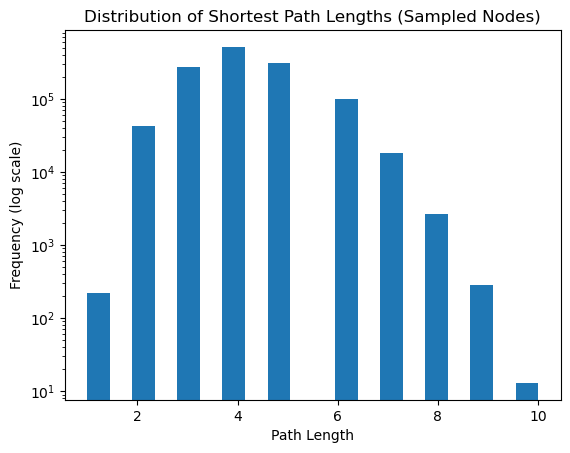

Average number of nodes reachable within 0 hops : 0
Average number of nodes reachable within 1 hops : 2
Average number of nodes reachable within 2 hops : 427
Average number of nodes reachable within 3 hops : 3169
Average number of nodes reachable within 4 hops : 8297
Average number of nodes reachable within 5 hops : 11383
Average number of nodes reachable within 6 hops : 12365


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# 1. Extract the giant component
G_giant = G.subgraph(giant_component) # where giant_component = max(nx.connected_components(G), key=len) as we've seen in the previous exercise
print(f"Giant component size : {G_giant.number_of_nodes()} out of {G.number_of_nodes()} total nodes") # Just a small reminder

# 2. Sample a subset of nodes to reduce computation time
sample_size = 100  # Use 100 nodes for sampling but we can modify the sample size
sampled_nodes = random.sample(list(G_giant.nodes()), sample_size) # Randomize the samples for "diversity"
print(f"Sampled {sample_size} nodes for analysis")

# 3. Compute distribution of path lengths using sampled nodes
path_lengths = []
for src in sampled_nodes:
    lengths = nx.single_source_shortest_path_length(G_giant, src) # this function will return a dict type *
    # Include path lengths >= 1 (exclude self-loops, length 0)
    filtered_lengths = []  # list where we are going to put filtered (path lengths >= 1) elements
    for length in lengths.values(): # * that's why we do lengths."value()" 
        if length >= 1:
            filtered_lengths.append(length)
    path_lengths.extend(filtered_lengths) # add all the elements of filtered_lenghts in path_lengths

# Compute average path length from sampled paths
avg_path_length = np.mean(path_lengths)
print(f"Estimated average shortest path length (from sampled nodes) : {avg_path_length:.2f}")

# Plot the distribution of path lengths
plt.hist(path_lengths, bins=20, log=True)
plt.xlabel("Path Length")
plt.ylabel("Frequency (log scale)")
plt.title("Distribution of Shortest Path Lengths (Sampled Nodes)")
plt.show()

# 4. Compute average number of reachable nodes by distance r
max_distance = 6  # Test up to 6 hops sunce it's called "six degrees of separation"

# reachable_counts = {r: [] for r in range(max_distance + 1)} if list comprehension mode preffered

reachable_counts = {}  # create an empy dictionary for the count
for r in range(max_distance + 1): # max_distance + 1 because it will iterate from 0 to 6 included
    reachable_counts[r] = []  # for each r, we create a list

for node in sampled_nodes:
    lengths = nx.single_source_shortest_path_length(G_giant, node, cutoff=max_distance) #cutoff=max_distance will limit/filter nodes with distance more than 6
    for r in range(max_distance + 1):
        # Count nodes reachable within r hops (exclude self-loops)        
        count = 0 
        for d in lengths.values():
            if 0 < d <= r:
                count += 1
        reachable_counts[r].append(count)

# Calculate average number of reachable nodes for each distance r
avg_reachable = {}  # This will map each r (distance in hops) to the average number of nodes reachable within r hops

# Iterate over each distance r in the reachable_counts dictionary
for r in reachable_counts:
    # Get the list of counts for the current distance r (each count represents the number of nodes reachable within r hops from a sampled node)
    counts = reachable_counts[r]
    # Calculate the mean of the counts for distance r and store it in avg_reachable
    avg_reachable[r] = np.mean(counts)

# Iterate over the avg_reachable dictionary to print the results
for r, avg in avg_reachable.items():
    # Print the average number of nodes reachable within r hops, formatted to display as an integer (no decimal places)
    print(f"Average number of nodes reachable within {r} hops : {avg:.0f}")

# Exercise 2.4 Explanation and answer

### 1. Extract the Giant Component
- We start with the giant component from the previous exercise (`giant_component = max(nx.connected_components(G), key=len)`), which was identified as the largest connected component in the graph `G`.
- `G.subgraph(giant_component)` creates a subgraph `G_giant` containing only the nodes and edges of the giant component.
- We print the size of the giant component and compare it to the total number of nodes in the original graph to confirm the scope of our analysis.

### 2. Sample a Subset of Nodes
- To reduce computation time, we sample a subset of nodes from `G_giant` using `random.sample(list(G_giant.nodes()), ample_size)`
- `sample_size = 100`is chosen as the number of nodes to sample, though this can be adjusted based on computational resources or desired accuracy.
- Random sampling ensures diversity in the selected nodes, providing a representative subset for analysis.
- We print the number of sampled nodes to confirm the sample size.

### 3. Compute Distribution of Path Lengths
- We initialize an empty list path_lengths to store the shortest path lengths between pairs of nodes.
- For each sampled node (`src` in `sampled_nodes`), we use `nx.single_source_shortest_path_length(G_giant, src)` to compute the shortest path lengths from `src` to all other nodes in `G_giant`.
- The function returns a dictionary (lengths) where keys are nodes and values are the shortest path lengths from `src` to each node.
- We extract the path lengths using `lengths.values()` and filter out paths of length 0 (self-loops) by only keeping `lengths >= 1`.
- The filtered lengths are stored in a temporary list `filtered_lengths` and then added to `path_lengths` using `extend()` to collect all path lengths in a single list.
- We compute the average shortest path length using `np.mean(path_lengths)` and print it to assess the network's connectivity.
- The distribution of path lengths is visualized as a histogram with `plt.hist(path_lengths, bins=20, log=True)`, using a logarithmic scale for the frequency to better visualize the distribution.

### 4. Compute Average Number of Reachable Nodes by Distance 
- We set `max_distance = 6` to test up to 6 hops, aligning with the "six degrees of separation" concept.
- We create a dictionary `reachable_counts` to store the number of nodes reachable within r hops for each sampled node, with keys from 0 to `max_distance` (inclusive) mapping to empty lists.
- For each sampled node (node in sampled_nodes), we use `nx.single_source_shortest_path_length(G_giant, node, cutoff=max_distance)` to compute the shortest path lengths to all other nodes, limiting the computation to paths of length max_distance or less.
- For each distance r from 0 to max_distance, we count the number of nodes reachable within r hops by iterating over the path lengths and counting those where the length is greater than 0 (excluding self-loops) and less than or equal to r.
- The count for each r is appended to the corresponding list in `reachable_counts`.
- We calculate the average number of reachable nodes for each r by iterating over `reachable_counts`, computing the mean of the counts for each r using `np.mean()`, and storing the result in a new dictionary `avg_reachable`.
- Finally, we print the average number of nodes reachable within each r hops, formatted as an integer.

### Answer to questions : 

#### 1. What is the distribution of path lengths between any two nodes in the network ?

The distribution of shortest path lengths in the giant component of network1 (12,576 nodes) was computed using 100 sampled nodes. The average shortest path length is approximately 4.10 (Those values might not be exactly the same for every time re running the code because we take 100 random samples but it will still provide something similar). 
A histogram of the path lengths shows that most paths are between 2 and 6 hops, with a peak around 4 to 5, and the maximum path length observed is 10. This indicates a relatively small diameter for a network of this size, suggesting efficient connectivity.

#### 2. How fast is the network growing ? (What is the average number of nodes reachable within a distance r of any other node ?)

The average number of nodes reachable within r hops from the sampled nodes is :
- r = 1 : 8 nodes
- r = 2 : 501 nodes
- r = 3 : 3502 nodes
- r = 4 : 8863 nodes
- r = 5 : 11399 nodes
- r = 6 : 12264 nodes 

Those values (r) might also change every time we re-run the code but it will still give a similar values.

The number of reachable nodes grows rapidly, reaching 98% of the giant component (12264 out of 12576 nodes) within 6 hops, indicating a logarithmic-like growth pattern typical of small-world networks.

#### Is network1 a small-world network? Justify your answer.

Yes, network1 is a small-world network. The average shortest path length of 4.10 is much smaller than the expected 
$log(12576)≈ 9.4$ for a network of this size, and it is also below the "six degrees of separation" threshold of 6. 
Additionally, the rapid growth in the number of reachable nodes—reaching 98% of the giant component within 6 hops demonstrates that the network is highly interconnected with short paths between nodes. These characteristics align with the small-world effect described by Duncan Watts, confirming that network1 exhibits strong small-world properties.

#### Exercise 2.5: Network comparison

Number of nodes : 26542
Number of edges : 43516

Properties of the degree distribution :
Minimum degree : 1
Maximum degree : 8
Average degree : 3.28


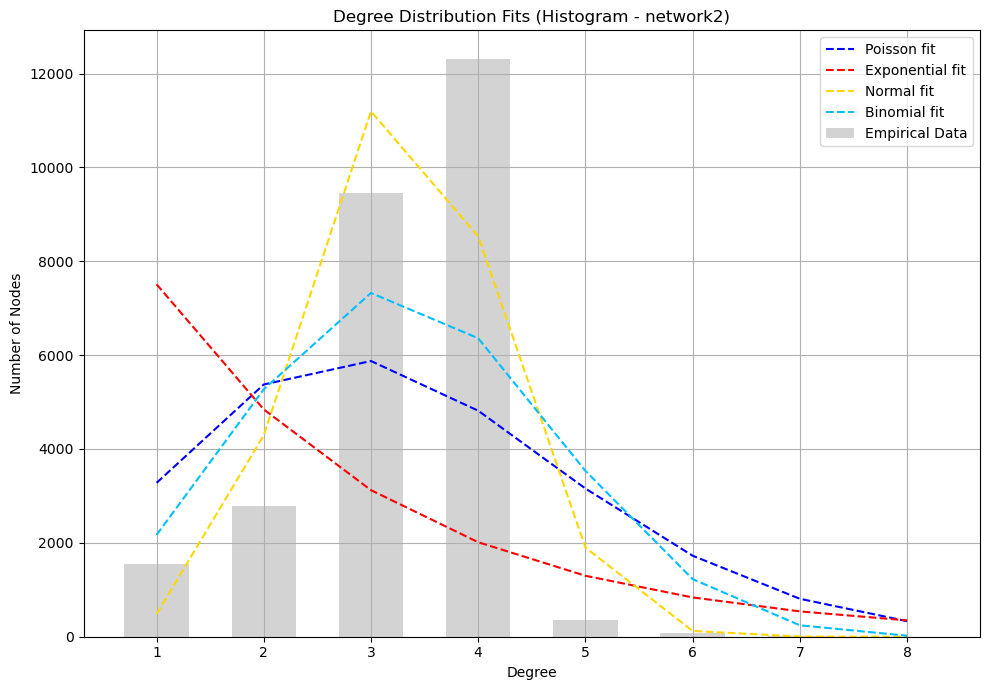

There exists a giant component and its size is : 26481

Estimated average shortest path length : 98.90
Average number of nodes reachable within 0 hops : 0
Average number of nodes reachable within 1 hops : 3
Average number of nodes reachable within 2 hops : 10
Average number of nodes reachable within 3 hops : 20
Average number of nodes reachable within 4 hops : 33
Average number of nodes reachable within 5 hops : 50
Average number of nodes reachable within 6 hops : 71


In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import poisson, expon, norm, binom

# ---Same as Exercise 2.1 ---
G2 = nx.Graph()
with open("../data/network2.csv", "r") as n2:
    for line in n2:
        if line.startswith("#"):
            continue
        i, j = line.strip().split(",")
        G2.add_edge(int(i), int(j))

num_nodes = G2.number_of_nodes()
num_edges = G2.number_of_edges()

print(f"Number of nodes : {num_nodes}")
print(f"Number of edges : {num_edges}")

# ---Same as Exercise 2.2 ---
node_degrees = [G2.degree(n) for n in G2]
degree_counts = np.bincount(node_degrees)
degrees = np.nonzero(degree_counts)[0]
counts = degree_counts[degrees]

min_degree = min(node_degrees)
max_degree = max(node_degrees)
avg_degree = 2 * num_edges / num_nodes

print(f"\nProperties of the degree distribution :")
print(f"Minimum degree : {min_degree}")
print(f"Maximum degree : {max_degree}")
print(f"Average degree : {avg_degree:.2f}")

x_vals = np.array(degrees)
y_vals = np.array(counts)
total_nodes = sum(y_vals)

# Poisson fit
lambda_poisson = np.mean(node_degrees)  # Estimate the lambda (mean) for Poisson distribution
poisson_probs = poisson.pmf(x_vals, lambda_poisson)  # Compute PMF values for each degree
poisson_fit = poisson_probs * total_nodes  # Scale to match the empirical total count

# Exponential fit
kappa_exp = expon.fit(node_degrees)[1]  # Estimate scale parameter for exponential distribution
exp_probs = expon.pdf(x_vals, scale=kappa_exp)  # Compute PDF values for each degree
exp_fit = exp_probs * total_nodes  # Scale to match the empirical total count

# Normal (Gaussian) fit
mu_norm, std_norm = norm.fit(node_degrees)  # Estimate mean and standard deviation
norm_probs = norm.pdf(x_vals, mu_norm, std_norm)  # Compute PDF values for each degree
norm_fit = norm_probs * total_nodes  # Scale to match the empirical total count

# Binomial fit (using max degree as n, and p = avg_degree / n)
n_binom = max_degree
p_binom = avg_degree / n_binom  # Estimate success probability
binom_probs = binom.pmf(x_vals, n_binom, p_binom)  # Compute PMF values for each degree
binom_fit = binom_probs * total_nodes  # Scale to match the empirical total count

# --- Plot all fitted distributions over the histogram (normal scale) ---
plt.figure(figsize=(10, 7))

# Plot empirical histogram as gray bars
plt.bar(x_vals, y_vals, width=0.6, color="lightgray", label="Empirical Data")

# Plot each fitted distribution using dashed lines and distinct colors
plt.plot(x_vals, poisson_fit, linestyle="--", color="blue", label="Poisson fit")
plt.plot(x_vals, exp_fit, linestyle="--", color="red", label="Exponential fit")
plt.plot(x_vals, norm_fit, linestyle="--", color="gold", label="Normal fit")
plt.plot(x_vals, binom_fit, linestyle="--", color="deepskyblue", label="Binomial fit")

# Add axis labels, title, and legend
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution Fits (Histogram - network2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---Same as Exercise 2.3 ---
num_components = nx.number_connected_components(G2)
giant_component = max(nx.connected_components(G2), key=len)
giant_size = len(giant_component)

if giant_size > 0.7 * num_nodes:
    # If true, print that a giant component exists along with its size
    print(f"There exists a giant component and its size is : {giant_size}")
else:
    # If false, print that there is no giant component
    print("There isn't any giant component in network2")

# ---Same as Exercise 2.4 ---
G2_giant = G2.subgraph(giant_component)
sample_size = 100
sampled_nodes = random.sample(list(G2_giant.nodes()), sample_size)
path_lengths = []

for node in sampled_nodes:
    lengths = nx.single_source_shortest_path_length(G2_giant, node)
    path_lengths.extend([l for l in lengths.values() if l > 0])

avg_path_length = np.mean(path_lengths)
print(f"\nEstimated average shortest path length : {avg_path_length:.2f}")

# Growth with hops
max_r = 6
reachable = {r: [] for r in range(max_r + 1)}
for node in sampled_nodes:
    lengths = nx.single_source_shortest_path_length(G2_giant, node, cutoff=max_r)
    for r in range(max_r + 1):
        count = sum(1 for d in lengths.values() if 0 < d <= r)
        reachable[r].append(count)

avg_reachable = {r: np.mean(reachable[r]) for r in reachable}
for r in avg_reachable:
    print(f"Average number of nodes reachable within {r} hops : {avg_reachable[r]:.0f}")

# Exercise 2.5 Explanation and answer

For this exercise, we have done exactly the same things that we did in 2.1, 2.2, 2.3, 2.4 to network2.csv. Hence, all the codes and explanations are identical with those in 2.1, 2.2, 2.3, 2.4. However, there are still some little modifications such as choosing which distribution law is adequate for network2.csv. Let's talk about the results of the code since the code itself is almost the same as the codes for network1.csv.

### 2.1 for network2 result : 
- Number of nodes: 26542
- Number of edges: 43516

### 2.2 for network2 result : 
We analyze the degree distribution using histogram plots and fit it with several known theoretical distributions : Poisson, Exponential, Normal, and Binomial.

Degree Distribution Properties :
- Minimum degree : 1
- Maximum degree : 8
- Average degree : 3.28

The distribution is narrow, centered around 3~4, with no heavy tail or high-degree hubs.

Fitting Results :
The resulting fits were plotted over the histogram of empirical data and the Normal distribution (yellow dashed line) closely matched the bell shape of the empirical data, unlike the exponential or Poisson, which deviated significantly.

### 2.3 for network2 result : 
- Number of connected components : 5
- Size of giant component : 26481 out of 26542 nodes (~99.8%)
Hence a giant component exists

### 2.4 for network2 result : 
To analyze the path structure, we sampled 100 random nodes in the giant component and computed :

- Average shortest path length
- Average number of nodes reachable within r hops (r = 0 to 6)

Results :
Estimated average shortest path length : ~96.95 (it changes everytime we rerun the code since we take 100 random samples but it will still be a similar value) and this is much longer than network1 (which was ~4.1)

Reachability growth :
- r = 0 : 0 nodes 
- r = 1	: 3 nodes 
- r = 2 : 10 nodes
- r = 3	: 20 nodes
- r = 4	: 35 nodes
- r = 5	: 52 nodes
- r = 6	: 73 nodes

This indicates slow network growth, unlike the rapid expansion seen in small-world networks. So if we should answer to the "six degree separation" problem, we can say that for network2.csv it clearly doesn't work with r = 6. Hence it is not a small-world

To conclude, network2.csv differs significantly from network1.csv :

- It does not follow a power-law distribution, but rather a normal distribution, indicating a more homogeneous, non-hub-like structure.

- The average shortest path is much longer and grows slowly with r, meaning it does not exhibit small-world behavior.

- Despite having a giant component, the network behaves more like a randomly connected, lattice-like graph with low variability in node connectivity.

- This suggests that network2 is not scale-free, and its structure is more uniform and less clustered than network1.

#### Exercise 2.6: Network identification

### Exercise 2.6 – Network Identification

Based on the structural analysis in Exercises 2.1 through 2.5, we conclude the following:

- `network1.csv` is most likely the **Internet router network**:
  - It exhibits a **power-law degree distribution**, with a maximum degree of 1482.
  - The network shows **small-world properties**, with an average shortest path of approximately 4.1.
  - These characteristics are typical of **scale-free networks** such as the Internet, where a few hubs are highly connected.

- `network2.csv` is most likely the **New York road network**:
  - The degree distribution is **normal**, with low maximum degree (8), suggesting most nodes have only 3-4 connections.
  - The average path length is **very long (~96.95)**, indicating a geographically constrained layout.
  - The network does **not** exhibit small-world behavior.
  - These are typical features of **road networks**, where intersections connect to a limited number of roads.

Therefore, by comparing the degree distributions, path lengths, and connectivity patterns, we identify:
- `network1.csv` → **Internet**
- `network2.csv` → **Roads in New York**
